# TALLER DE CLASIFICACIÓN
Por: Jairo Castrellón Torres, Estudiante de la maestría en estadística


## BAYES

**1)** Crear un modelo usando Naive Bayes a un conjunto de datos categórico.

     a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.
     b) Entrenar el modelo
     c) Aplicar el modelo al conjunto de test
     d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de recuperación (Recall), Medida F1

Se instalan las librerias necesarias:

In [1]:
!pip install scikit-plot

In [0]:
from sklearn import metrics
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Se carga un conjunto de datos sobre el cancer de seno, con alguna información del tumor presente, y se quiere clasificar con base en el atributo "irradiat"

In [3]:
data = pd.read_csv('breast-cancer.csv', delimiter=',')
data.tail(7)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
279,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
280,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


Para esto, es necesario discretizar algunos de los atributos que se presentan de manera ordinal:

In [0]:
def discrt(x):
  z=np.zeros(len(x))
  y=x.value_counts()
  for j in range(0,len(y)):
    for i in range(0,len(x)):
      if x[i]== y.index[j]:
        z[i]=j
  return z


In [0]:
data['class']=discrt(data['class'])
data['age']=discrt(data['age'])
data['menopause']=discrt(data['menopause'])
data['tumor-size']=discrt(data['tumor-size'])
data['inv-nodes']=discrt(data['inv-nodes'])
data['node-caps']=discrt(data['node-caps'])
data['breast']=discrt(data['breast'])
data['breast-quad']=discrt(data['breast-quad'])
data['irradiat']=discrt(data['irradiat'])

data=np.array(data)
X = data[:,:9]
Y = data[:,9:]

Posteriormente, se divide el conjunto de datos en los datos de entrenamiento y los datos de prueba, de manera que en proporción se tiene un 70%-30% respectivamente:

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=5)

In [7]:
clf = MultinomialNB()
clf.fit(x_train, y_train.flatten())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
predictions = clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(predictions, y_test))

Accuracy Score:  0.8023255813953488


Con base en lo anterior se ve que el clasificador acertó en un 80,23% de los datos. A continuación se presenta la matriz de confusión:

Accuracy DT 0.8023255813953488
Metricas DT
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        63
         1.0       0.69      0.48      0.56        23

    accuracy                           0.80        86
   macro avg       0.76      0.70      0.72        86
weighted avg       0.79      0.80      0.79        86



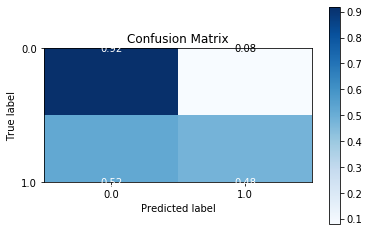

In [9]:
print('Accuracy DT', metrics.accuracy_score(y_test, predictions))

print('Metricas DT\n', metrics.classification_report(y_test, predictions)) 

plot = skplt.metrics.plot_confusion_matrix(y_test, predictions,normalize=True,title='Confusion Matrix')

**2)** Crear un modelo usando Naive Bayes al conjunto de datos de IRIS.

     a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.
     b) Entrenar el modelo
     c) Aplicar el modelo al conjunto de test
     d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1

Se carga el conjunto de datos iris:

In [10]:
iris = pd.read_csv('iris.csv', delimiter=',',header=None)
iris.tail(7)

,0,1,2,3,4
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
iris=np.array(iris)
X = iris[:,:4]
Y = iris[:,4:]

Se hace la partición de los datos 70%-30% para los datos de entrenamiento y de prueba respectivamente:

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=5)

In [13]:
clf = GaussianNB()
clf.fit(x_train, y_train.flatten())

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
predictions = clf.predict(x_test)
print('Accuracy Score: ', accuracy_score(predictions, y_test))

Accuracy Score:  0.9333333333333333


obteniendo un acierto en el 93% de los datos de prueba en su clasificación. Y se presenta la matríz de confusión como sigue:

Accuracy DT 0.9333333333333333
Metricas DT
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



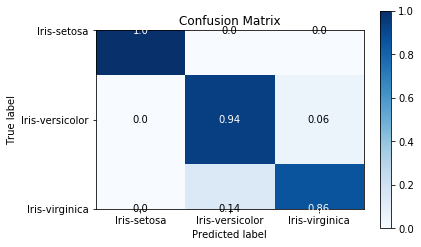

In [15]:
print('Accuracy DT', metrics.accuracy_score(y_test, predictions))

print('Metricas DT\n', metrics.classification_report(y_test, predictions)) 

plot = skplt.metrics.plot_confusion_matrix(y_test, predictions,normalize=True,title='Confusion Matrix')

____________________________

## ARBOL DE DECISION

**1)** Descargar el conjunto de datos nba.txt . Leer la descripción del conjunto de datos en la cabecera del archivo.

**2)** Carguar el conjunto de datos en Weka, RapidMiner o python.

In [16]:
df = pd.read_csv("nba.csv")
df.head(5)

,G,GS,MPG,FG%,3p%,FT%,OFF,DEF,RPG,APG,SPG,BPG,TO,PF,PPG,Class
0,362,223,24.4,0.466,0.405,0.800,0.6,2.1,2.7,1.5,0.5,0.3,0.8,2.0,8.8,1
1,19,0,11.9,0.273,0.298,0.970,0.1,1.1,1.2,1.2,0.4,0.0,1.2,1.4,4.6,1
2,1148,1140,36.9,0.452,0.400,0.894,1.0,3.2,4.2,3.6,1.2,0.2,2.2,2.3,20.0,1
3,466,170,19.8,0.482,0.284,0.745,0.9,1.9,2.8,1.3,1.2,0.4,1.4,2.2,7.8,1
4,38,1,9.5,0.381,0.292,0.743,0.3,0.9,1.2,0.3,0.3,0.1,0.5,1.1,3.1,1


**3)** Construir un modelo de clasificación usando un árbol de decisión:

     a) Realizar una partición del conjunto de datos, usando muestreo estratificado: 70 % para entrenamiento y 30 % para test.
     b) Entrenar el modelo
     c) Aplicar el modelo al conjunto de test
     d) Medir el desempeño del modelo calculando Matriz de confusión, Exactitud (Accuracy), Error de clasificación, Precisión (Precision), Índice de Recuperación (Recall), Medida F1 y Área bajo la curva ROC.
     e) Interprete el modelo obtenido:
        1) ¿Cuál el el atributo más discriminante? De una explicación a partir del conocimiento del problema.
        2) Genere 3 diferentes reglas de clasificación a partir del árbol. Explíquelas.

**a)**

In [0]:
nba=np.array(df)
X = nba[:,:15]
Y = nba[:,15:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=5)

**b)**

In [0]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [19]:
arbol=DecisionTreeClassifier()
arbol.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**c)**

In [20]:
arbol.score(x_test, y_test) 

0.9354838709677419

In [21]:
predictions = arbol.predict(x_test)
print('Accuracy Score: ', accuracy_score(predictions, y_test))

Accuracy Score:  0.9354838709677419


**d)**

Accuracy DT 0.9354838709677419
Metricas DT
               precision    recall  f1-score   support

         1.0       0.96      0.93      0.95        56
         2.0       0.90      0.95      0.92        37

    accuracy                           0.94        93
   macro avg       0.93      0.94      0.93        93
weighted avg       0.94      0.94      0.94        93



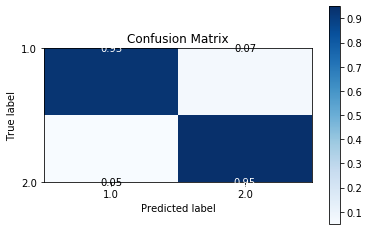

In [22]:
print('Accuracy DT', metrics.accuracy_score(y_test, predictions))

print('Metricas DT\n', metrics.classification_report(y_test, predictions)) 

plot = skplt.metrics.plot_confusion_matrix(y_test, predictions,normalize=True,title='Confusion Matrix')

**e)** 

In [0]:
t=["G", "GS", "MPG", "FG%", "3p%", "FT%", "OFF", "DEF", "RPG", "APG", "SPG", "BPG", "TO", "PF", "PPG"]
export_graphviz(arbol, out_file='arbol.dot', class_names=["perimetral","internos"],
                feature_names=t, impurity=False, filled=True)

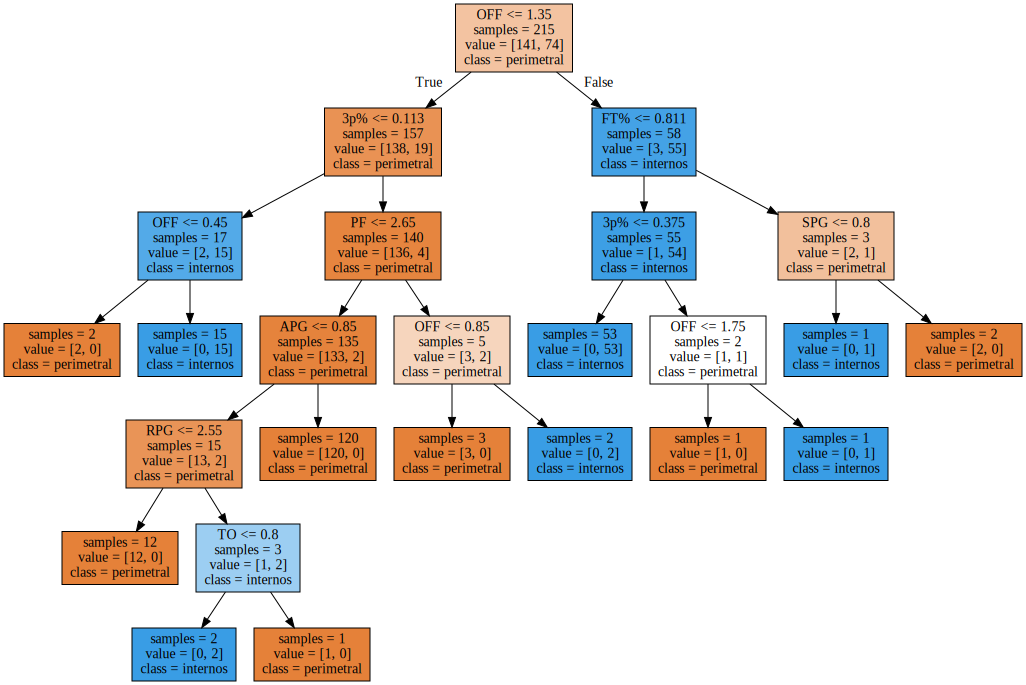

In [24]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

**Reglas:** lo anterior se puede ver las reglas de decisión en el árbol para su respectiva clasificación.

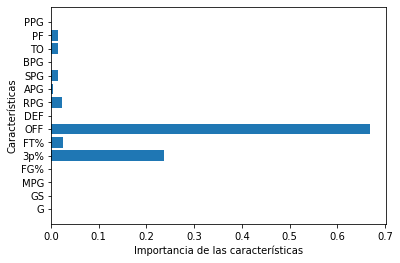

In [25]:
caract=X.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),t)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

**Atributos mas determinantes** Según la gráfica anterior se pueden ver que las características o atributos mas determinantes son OFF (Rebotes ofensivos) y 3p% (Porcentaje de tiro de tres puntos), lo cuál tiene sentido debido a que los jugadores en posiciones delanteras, tienen más oportunidades de ganar rebotes, o mayor efectividad a la hora de realizar lanzamientos de 3 puntos.

------------------------------------------------------

**4)** Complejidad del modelo y sobre-aprendizaje:

     a) Modifique el modelo anterior para que también calcule el desempeño en el conjunto de entrenamiento.

     b) Haga diferentes pruebas cambiando la profundidad máxima del árbol. Pruebe los valores 1,2,...,10.
     c) Grafique a profundidad del árbol contra la evolución del error de entrenamiento y el error de prueba.
     d) De acuerdo con la gráfica, ¿Cuál sería un buen valor de profundidad para el árbol?

**a)**

In [26]:
arbol.score(x_train, y_train) 

1.0

**b)**  Probando para los diferentes valores de la profundidad del arbol se tiene:

In [27]:
train_err=[]
test_err=[]
I=range(1,11)
for i in I:
  arboli=DecisionTreeClassifier(max_depth=i)
  arboli.fit(x_train, y_train)
  test_err.append(1-arboli.score(x_test, y_test))
  train_err.append(1-arboli.score(x_train, y_train))
  print(f"Prof del árbol {i}: Precisión para el modelo en el datatest es {arboli.score(x_test, y_test)} y para los datos de entrenamiento {arboli.score(x_train, y_train)}")

Prof del árbol 1: Precisión para el modelo en el datatest es 0.8064516129032258 y para los datos de entrenamiento 0.8976744186046511
Prof del árbol 2: Precisión para el modelo en el datatest es 0.8924731182795699 y para los datos de entrenamiento 0.9627906976744186
Prof del árbol 3: Precisión para el modelo en el datatest es 0.9032258064516129 y para los datos de entrenamiento 0.9813953488372092
Prof del árbol 4: Precisión para el modelo en el datatest es 0.9139784946236559 y para los datos de entrenamiento 0.9906976744186047
Prof del árbol 5: Precisión para el modelo en el datatest es 0.9139784946236559 y para los datos de entrenamiento 0.9953488372093023
Prof del árbol 6: Precisión para el modelo en el datatest es 0.9139784946236559 y para los datos de entrenamiento 1.0
Prof del árbol 7: Precisión para el modelo en el datatest es 0.9247311827956989 y para los datos de entrenamiento 1.0
Prof del árbol 8: Precisión para el modelo en el datatest es 0.9354838709677419 y para los datos de

Se puede ver que entre más profundo son las ramas del árbol, el modelo sobreajusta cada vez más, aunque en el conjunto de test no parezca haber una relación entre la precisión y la profundidad del árbol.

**C)** Graficando la profundidad del árbol vs el error de entrenamiento, se obtiene:

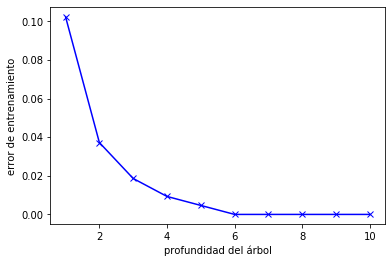

In [28]:
plt.plot(I, train_err, 'bx-')
plt.xlabel('profundidad del árbol')
plt.ylabel('error de entrenamiento')
plt.show()

Donde se puede notar, que a medida que la profundidad del árbol es mayor, el modelo cada vez más se sobreajusta a los datos, en particular, cuando el profundidad del árbol es mayor o igual que 6, el error es 0. Por otro lado graficando la profundidad del árbol vs el error en el conjunto de prueba se tiene:

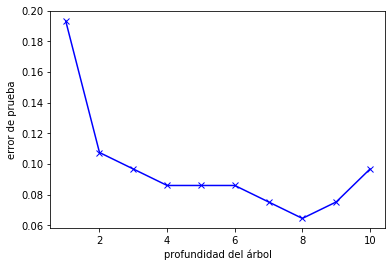

In [29]:
plt.plot(I, test_err, 'bx-')
plt.xlabel('profundidad del árbol')
plt.ylabel('error de prueba')
plt.show()

Donde no se ve una uniformidad en el comportamiento de los errores, apenas se puede ver que toma su menor valor en 6 y 7, mientras que en 1 toma el mayor valor de error.

**d)** De acuerdo con las gráficas, un valor adecuado, sin incurrir en sobreajuste y un valor bajo del error de prueba es cuando la profundidad del árbol es igual a 5.

**5)** Curva de aprendizaje:

     a) Cambie la proporción de datos usados para entrenar usando diferentes valores: 10 %, 20 %,...,90 %.
     b) Grafique la evolución del error de entrenamiento y el de prueba contra el porcentaje de ejemplos de entrenamiento.
     c) Explique el comportamiento de las curvas.


**a)**

In [30]:
nba=np.array(df)
X = nba[:,:15]
Y = nba[:,15:]
traink_err=[]
testk_err=[]
K=range(1,10)
for k in K:
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=k/10, random_state=5)
  arbolk=DecisionTreeClassifier()
  arbolk.fit(x_train, y_train)
  testk_err.append(1-arbolk.score(x_test, y_test))
  traink_err.append(1-arbolk.score(x_train, y_train))
  print(f"Porcentaje de datos de prueba: {k*10}%; Error de prueba: {1-arbolk.score(x_test, y_test)}; Error de entrenamiento: {1-arbolk.score(x_train, y_train)}")

Porcentaje de datos de prueba: 10%; Error de prueba: 0.25806451612903225; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 20%; Error de prueba: 0.08064516129032262; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 30%; Error de prueba: 0.09677419354838712; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 40%; Error de prueba: 0.07258064516129037; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 50%; Error de prueba: 0.07792207792207795; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 60%; Error de prueba: 0.05945945945945941; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 70%; Error de prueba: 0.05555555555555558; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 80%; Error de prueba: 0.09311740890688258; Error de entrenamiento: 0.0
Porcentaje de datos de prueba: 90%; Error de prueba: 0.19784172661870503; Error de entrenamiento: 0.0


**b)**

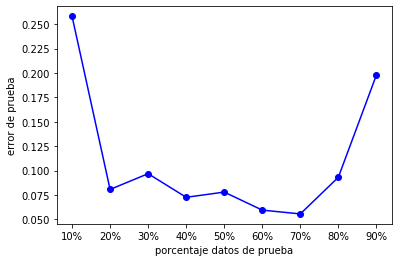

In [31]:
Kp=["10%","20%","30%","40%","50%","60%","70%","80%","90%"]
plt.plot(Kp, testk_err, 'bo-')
plt.xlabel('porcentaje datos de prueba')
plt.ylabel('error de prueba')
plt.show()

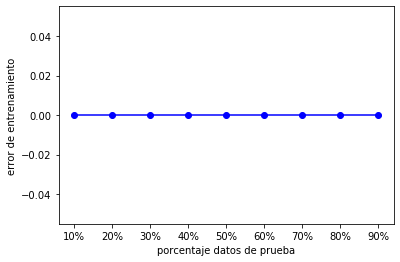

In [32]:
Kp=["10%","20%","30%","40%","50%","60%","70%","80%","90%"]
plt.plot(Kp, traink_err, 'bo-')
plt.xlabel('porcentaje datos de prueba')
plt.ylabel('error de entrenamiento')
plt.show()

**c)**

Como se puede notar en las gráficas anteriores, el error de entrenamiento no cambia con respecto a la partición que se haga de los datos, debido a que el algorítmo de árboles de decisión trata de ajustarse muy bien a los datos con los que cuenta, lo que implicaría un sobre ajuste. Por otro lado, los errores de prueba se ven que disminuyen cuando se hace una partición donde el data test está entre el 40% y 70% de los datos, aunque ususalmente, un porcentaje mayor del 50% parece bastante, se puede notar que en 70% el error alcanza su valor mínimo.

## NEARETS NEIGHBOR

**1)**  Suponga que los ejemplos categóricos de 5 dimensiones:

In [33]:
A=[1,0,1,1,0]
B=[1,1,0,1,0]
C=[0,0,1,1,0]
D=[0,1,0,1,0]
E=[1,0,1,0,1]
F=[0,1,1,0,0]
Z=["C1","C1","C2","C2","C1","C2"]
data=[A,B,C,D,E,F]
data

[[1, 0, 1, 1, 0],
 [1, 1, 0, 1, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1],
 [0, 1, 1, 0, 0]]

**a)** Use el algoritmo de k-nearest neighbor para encontrar la clasificación de los siguientes ejemplos:


*   Y={1,1,0,1,1} usando K = 1

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data,Z)
  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
Y=[1,1,0,1,1]
print(f"La clase de Y={Y} es {neigh.predict([Y])} cuando K={1}")

La clase de Y=[1, 1, 0, 1, 1] es ['C1'] cuando K=1


*   Y={1,1,0,1,1} usando K = 3

In [36]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data,Z)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
print(f"La clase de Y={Y} es {neigh.predict([Y])} cuando K={3}")

La clase de Y=[1, 1, 0, 1, 1] es ['C1'] cuando K=3


*    Y={0,1,0,0,0] usando K = 1

In [38]:
neighs = KNeighborsClassifier(n_neighbors=1)
neighs.fit(data,Z)
Y=[0,1,0,0,0]
print(f"La clase de Y={Y} es {neigh.predict([Y])} cuando K={1}")

La clase de Y=[0, 1, 0, 0, 0] es ['C2'] cuando K=1


*    Y={0,1,0,0,0] usando K = 5

In [39]:
neighs = KNeighborsClassifier(n_neighbors=5)
neighs.fit(data,Z)
Y=[0,1,0,0,0]
print(f"La clase de Y={Y} es {neigh.predict([Y])} cuando K={5}")

La clase de Y=[0, 1, 0, 0, 0] es ['C2'] cuando K=5


**b)** Discuta los resultados:

Lo que se puede concluir de los resultados anteriores es que a pesar que se aumento, para ambos objetos, el numero de vecinos para la clasificación, el algorítmo siempre siguió caracterizaándolos en la misma clase. Para el segundo caso, en particular, cuando K=5, se hizo una agrupación de todo el conjunto de datos, y aún así lo siguió agrupando en la clase C2, por lo que pareciera que el clasificador actua bien en este tipo de casos.

## VALIDACIÓN

Se tiene la siguiente tabla correspondiente a 10 registros con su clase (5 +, y 5 -), la clase corresponde
a la segunda columna. La tercera columna corresponde a la probabilidad “Posterior” P(+|x) generada
por un clasificador “Naive Bayes” ordenados. Las otras columnas corresponden a TP, FP, TN y FN
cuando se clasifican todos los registros mayores a la P(+|x) del registro actual como clase +, y los
que son menores a P(+|x) como clase -. Por ejemplo, los valores de la primera fila indican que los 10
resgistros fueron clasificados como +, pero 5 son de la clase - (FP); los valores de la segunda fila indican
que 9 registros fueron clasificados como +, y 1 como - (5 son de la clase -); los valores de la tercera fila
indican que 8 registros fueron clasificados como +, de los cuales 4 son de la clase -.

**a)** Calcular la TPR y FPR



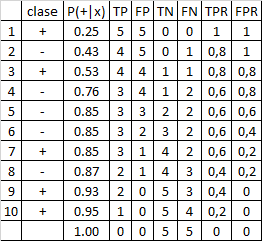

**1)** Dibujar la curva Receiver Operating Characteristics (ROC)

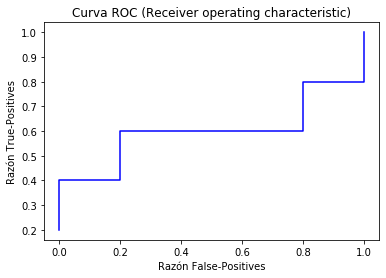

In [40]:
TPR=[1,0.8,0.8,0.6,0.6,0.6,0.6,0.4,0.4,0.2]
FPR=[1,1,0.8,0.8,0.6,0.4,0.2,0.2,0,0]
plt.plot(FPR, TPR, 'b-')
plt.xlabel('Razón False-Positives')
plt.ylabel('Razón True-Positives')
plt.title('Curva ROC (Receiver operating characteristic)')
plt.show()

## COMPARACION DE MODELOS

*    Usando los datos de la NBA,
             1. Entrene un modelo de clasificación Naïve Bayes y evalúelo usando validación cruzada de tamaño 10
             2. Entrene un árbol de decisión y evalúelo usando validación cruzada con 10
             3. Cuál de los dos modelos es mejor?

**1)**

In [41]:
from sklearn.model_selection import cross_validate

nba=np.array(df)
X = nba[:,:15]
Y = nba[:,15:]
NBayes = GaussianNB()
cvNB= cross_validate(NBayes, X, Y, cv=10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [42]:
cvNB['test_score']

array([0.9375    , 0.90322581, 0.96774194, 0.96774194, 1.        ,
       0.87096774, 1.        , 1.        , 1.        , 0.96666667])

**2)**

In [43]:
Dectree=DecisionTreeClassifier()
cvdectree= cross_validate(Dectree, X, Y, cv=10)
cvdectree['test_score']

array([0.84375   , 0.87096774, 0.90322581, 0.87096774, 0.96774194,
       0.83870968, 0.96774194, 0.96666667, 0.96666667, 0.86666667])

**3)** De los resultados obtenidos para cada una de los clasificadores en cada subconjunto de datos se puede ver que el que mejor clasifica es el hecho por el modelo de Naive bayes.

## CLASIFICACION CON COSTOS

1. Utilice el conjunto de datos credit-german.csv
2. Entrene un modelo Naïve Bayes usando validación cruzada
3. Suponiendo que la clase Good es positiva, cuántos falsos positivos tiene el modelo resultante? cuántos
falsos negativos? De acuerdo con el problem, qué tipo de error debería ser más costoso?
4. Utilice MetaCost (operador: MetaCost) para sesgar el modelo de manera que se disminuya el número
de errores costosos. Utilice una matriz de costo donde un tipo de error sea 10 veces más costoso que el
otro.
5. Evalue la matriz de confusión resultante y compárela con la original. Se cumplió el objetivo?

**1)**

In [44]:
dataf=pd.read_csv('credit-german.csv', sep=';')
dataf.head(5)

,checking_status,disc_duration,credit_history,purpose,credit_amount,savings_status,employment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing,radio/tv,1169,no known savings,>=7,male single,none,real estate,67,none,own,two,skilled,one,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,female div/dep/mar,none,real estate,22,none,own,one,skilled,one,none,yes,bad
2,no checking,12,critical/other existing,education,2096,<100,4<=X<7,male single,none,real estate,49,none,own,one,unskilled resident,two,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,male single,guarantor,life insurance,45,none,for free,one,skilled,two,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,male single,none,no known property,53,none,for free,two,skilled,two,none,yes,bad


**2)**

In [45]:
df=dataf
for i in df.columns:
  if type(df[i][5])!= np.int64:
    df[i]=discrt(df[i])
credit=np.array(df)
X = credit[:,:18]
Y = credit[:,18:]
NB = GaussianNB()
cvNB= cross_validate(NB, X, Y, cv=7)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [48]:
pred=cvNB['test_score']
pred

array([0.73426573, 0.74825175, 0.67132867, 0.69230769, 0.68531469,
       0.69230769, 0.73239437])